# Human capital accumulation

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D

In [2]:
rho = 2
beta = 0.96
gamma = 0.1
w = 2
b = 1
Delta = 0.1

h_vec = np.linspace(0.1,1.5,100) 

In [3]:
class HumanCapitalAccumulation:
    def __init__(self, rho, beta, gamma, w, b, delta, h_vec):
        self.rho = rho
        self.beta = beta
        self.gamma = gamma
        self.w = w
        self.b = b
        self.delta = delta
        self.h_vec = h_vec
        
    def consumption(self,l_t, h_t):
        if l_t==1:
            c_t = self.w*h_t*l_t
            
        if l_t==0:
            c_t = self.b
            
        return c_t
            
    def utility(self,l_t,h_t):
        u_t = self.consumption(l_t, h_t)**(1-self.rho)/(1-self.rho) - self.gamma*l_t
        
        return u_t
    
    def humancapital(self, l_t, h_t, prob):
        h_2 = h_t + l_t + prob*self.delta
        
        return h_2

    def period1(self,l_t,h_t):
        #expected humancapital
        #h2 = 0.5 * self.humancapital(h_t, l_t, 1) + 0.5 * self.humancapital(h_t,l_t,0)
        h2 = self.humancapital(h_t, l_t, 0.5)
        
        #utility
        v1 = self.utility(l_t, h_t) + self.beta * self.utility(l_t,h2)
        
        return v1
    
    def period2(self, l_t, h_t):
        v2 = self.utility(l_t, h_t)
        
        return v2
    
    def solution(self, period):
        humancap = []
        optimallabour = []
        optimalutil = []
        workutil = []
        unemputil = []
        
        for h in self.h_vec:
            list = [period(0, h), period(1, h)]
            
            if list[1]>list[0]:
                optimallabour.append(1)
            else:
                optimallabour.append(0)
            
            optimalutil.append(max(list))
            workutil.append(list[1])
            unemputil.append(list[0])
            humancap.append(h)
        
        data = pd.DataFrame()
        data["h"]=humancap
        data["best l"]=optimallabour
        data["best u"]=optimalutil
        data["work u"]=workutil
        data["unemp u"]=unemputil
        
        return data

In [4]:
question1 = HumanCapitalAccumulation(rho,beta,gamma, w, b, Delta, h_vec)

### Question 1

In [5]:
data1 = question1.solution(question1.period2)

,h,best l,best u,work u,unemp u
33,0.566667,1,-0.982353,-0.982353,-1.0


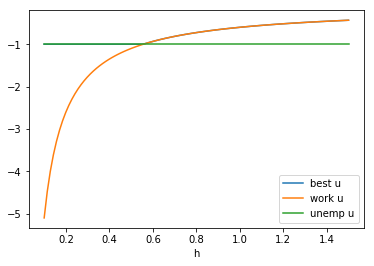

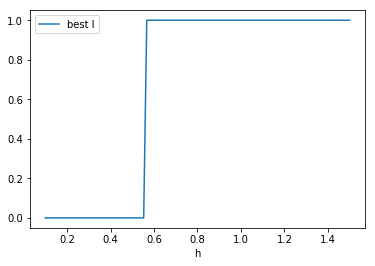

In [6]:
data1.plot(0,[2,3,4])
data1.plot(0,1)

data1[data1["unemp u"]<data1["work u"]].head(1)

### Question 2

In [7]:
data2 = question1.solution(question1.period1)

In [8]:
data2.head()

,h,best l,best u,work u,unemp u
0,0.100000,0,-1.96,-5.613391,-1.96
1,0.114141,0,-1.96,-4.988852,-1.96
2,0.128283,0,-1.96,-4.501010,-1.96
3,0.142424,0,-1.96,-4.109180,-1.96
4,0.156566,0,-1.96,-3.787372,-1.96


,h,best l,best u,work u,unemp u
18,0.354545,1,-1.948004,-1.948004,-1.96


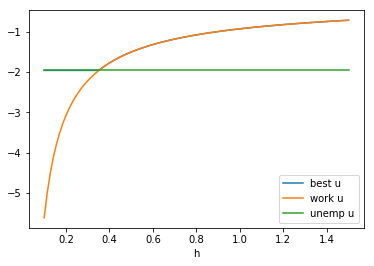

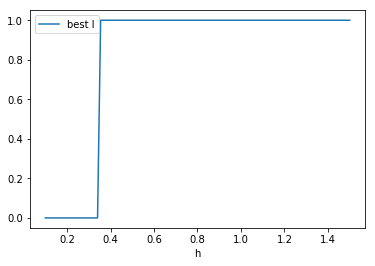

In [9]:
data2.plot(0,[2,3,4])
data2.plot(0,1)

data2[data2["unemp u"]<data2["work u"]].head(1)

### Question 3

In [10]:
data3 = question1.solution(question1.utility)

In [11]:
slice1 = data2.loc[data2["best l"]==1]
slice2 = data3.loc[data3["best l"]==1]

diff = slice1[~slice1["h"].isin(slice2["h"])]

In [12]:
print(diff)

           h  best l    best u    work u  unemp u
18  0.354545       1 -1.948004 -1.948004    -1.96
19  0.368687       1 -1.890505 -1.890505    -1.96
20  0.382828       1 -1.837070 -1.837070    -1.96
21  0.396970       1 -1.787270 -1.787270    -1.96
22  0.411111       1 -1.740733 -1.740733    -1.96
23  0.425253       1 -1.697140 -1.697140    -1.96
24  0.439394       1 -1.656210 -1.656210    -1.96
25  0.453535       1 -1.617697 -1.617697    -1.96
26  0.467677       1 -1.581387 -1.581387    -1.96
27  0.481818       1 -1.547089 -1.547089    -1.96
28  0.495960       1 -1.514633 -1.514633    -1.96
29  0.510101       1 -1.483870 -1.483870    -1.96
30  0.524242       1 -1.454666 -1.454666    -1.96
31  0.538384       1 -1.426899 -1.426899    -1.96
32  0.552525       1 -1.400463 -1.400463    -1.96


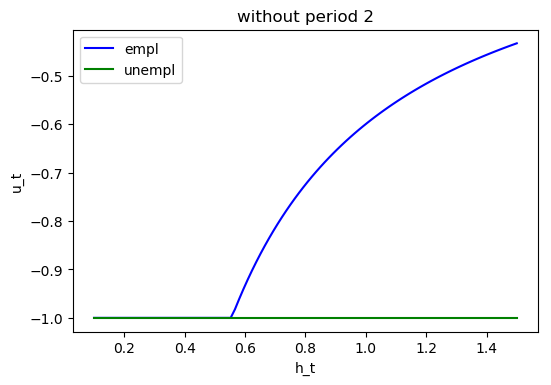

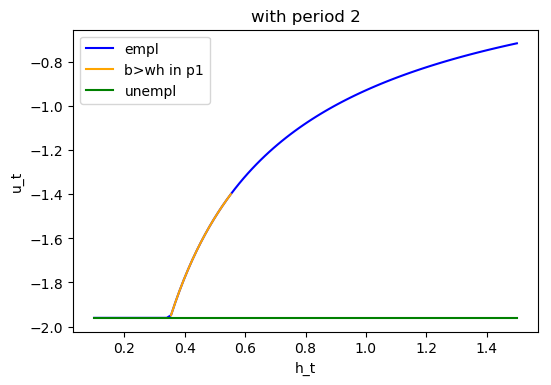

In [13]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(data3["h"],data3["best u"], label = "empl", color ="b")
ax.plot(data3["h"],data3["unemp u"], label = "unempl", color ="g")
ax.set_title("without period 2")
ax.set_xlabel("h_t")
ax.set_ylabel("u_t")
ax.legend()


fig1 = plt.figure(dpi=100)
ax2 = fig1.add_subplot(1,1,1)
ax2.plot(data2["h"],data2["best u"], label = "empl", color="b")
ax2.plot(diff["h"],diff["best u"], label = "b>wh in p1", color="orange")
ax2.plot(data2["h"],data2["unemp u"], label = "unempl", color="g")
ax2.set_title("with period 2")
ax2.set_xlabel("h_t")
ax2.set_ylabel("u_t")
ax2.legend()




# AS-AD Model

# Exchange economy

In [14]:
# a. parameters
N = 50000
mu = np.array([3,2,1])
Sigma = np.array([[0.25, 0, 0], [0, 0.25, 0], [0, 0, 0.25]])
gamma = 0.8
zeta = 1

# b. random draws
seed = 1986
np.random.seed(seed)

# preferences
alphas = np.exp(np.random.multivariate_normal(mu, Sigma, size=N))
betas = alphas/np.reshape(np.sum(alphas,axis=1),(N,1))

# endowments
e1 = np.random.exponential(zeta,size=N)
e2 = np.random.exponential(zeta,size=N)
e3 = np.random.exponential(zeta,size=N)

elist = [e1,e2,e3]

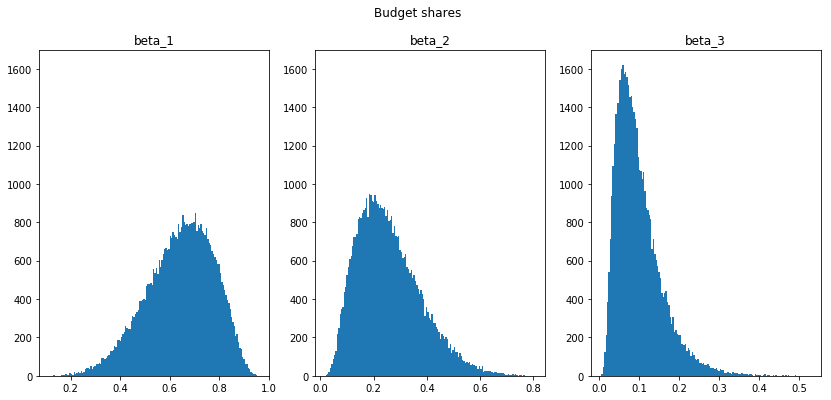

In [15]:
fig, axs = plt.subplots(1,3, figsize=(14,6))
fig.suptitle('Budget shares')

ylims = (0,1700)

axs[0].hist(betas[:,0], bins=150)
axs[0].set_title("beta_1")
axs[0].set_ylim(ylims)

axs[1].hist(betas[:,1], bins=150)
axs[1].set_title("beta_2")
axs[1].set_ylim(ylims)

axs[2].hist(betas[:,2], bins=150)
axs[2].set_title("beta_3")
axs[2].set_ylim(ylims)

plt.show()

In [16]:
for i in range(3):
    print(f"mean for beta_{str(i+1)} is {np.mean(betas[:,i]):.4f}")
    print(f"variance for beta_{str(i+1)} is {np.var(betas[:,i]):.4f}")

mean for beta_1 is 0.6423
variance for beta_1 is 0.0182
mean for beta_2 is 0.2581
variance for beta_2 is 0.0142
mean for beta_3 is 0.0996
variance for beta_3 is 0.0033


In [17]:
class ExchangeEconomy:
    def __init__(self,betas, e1,e2,e3, N):
        self.betas = betas
        self.e1 = e1
        self.e2 = e2
        self.e3 = e3
        self.N = N
        self.betas1 = betas[:,0]
        self.betas2 = betas[:,1]
        self.betas3 = betas[:,2]
        
    def budget(self,p1,p2):
        I = np.empty(self.N)
        for j in range(self.N):
            I[j] = p1 * self.e1[j] + p2 * self.e2[j] + self.e3[j]
            
        return I
    
    def demand_func(self,p1,p2):
        x1 = np.empty(self.N)
        x2 = np.empty(self.N)
        x3 = np.empty(self.N)
        
        I = self.budget(p1,p2)
        
        for j in range(self.N):
            x1[j] = self.betas1[j] * I[j] / p1
            x2[j] = self.betas2[j] * I[j] / p2
            x3[j] = self.betas3[j] * I[j]
        
        return x1,x2,x3
    
    def excess_demand(self,p1,p2):
        z = np.empty(3)
        x1,x2,x3 = self.demand_func(p1,p2)
        
        z[0] = np.sum(x1)-np.sum(e1)
        z[1] = np.sum(x2)-np.sum(e2)
        z[2] = np.sum(x3)-np.sum(e3)
            
        return z
    
    
    def plot3d(vec):
        array1 = np.empty((len(vec), len(vec)))
        array2 = np.empty((len(vec), len(vec)))
        array3 = np.empty((len(vec), len(vec)))

        for i, p1 in enumerate(price_vec):
            for j,p2 in enumerate(price_vec):
                a = ExchangeEconomy(betas, elist, N, p1, p2)
                z = a.excess_demand()
                array1[i,j] = z[0]
                array2[i,j] = z[1]
                array3[i,j] = z[2]
        return array1, array2, array3
    def utility(self):
        
        util = []
        for i in range(3):
            util.append()
        return

In [3]:
price_vec = np.linspace(0,5,10,50)
a = ExchangeEconomy(betas, elist, N)
def plot3d():
    array1 = np.empty((len(price_vec), len(price_vec)))
    array2 = np.empty((len(price_vec), len(price_vec)))
    array3 = np.empty((len(price_vec), len(price_vec)))

    for i, p1 in enumerate(price_vec):
        for j,p2 in enumerate(price_vec):
            z = a.excess_demand(p1,p2)
            array1[i,j] = z[0]
            array2[i,j] = z[1]
            array3[i,j] = z[2]
    return array1, array2, array3
%time plot3d()

NameError: name 'betas' is not defined

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
cs = ax.plot_surface(price_vec,price_vec,array1, cmap=cm.jet)

fig.suptitle('Excess Demand')

In [21]:
a = ExchangeEconomy(betas, e1,e2,e3, N)
%time z = a.excess_demand(p1=2,p2=2)

Wall time: 313 ms


In [27]:
price_vec = np.linspace(0.1,10,100)
len(price_vec)

100